# CNN convolution neural network

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers,models,optimizers,utils,datasets

In [3]:
NUM_CLASSES=10
CLASSES=np.array(['airplane','automobile','bird','cat','deer',' dog','frog','horse','ship','truck'])

In [26]:
def display(images,labels,n=10, size=(20,3),cmap='gray_r',as_type='float32',save_to=None):
    # images => 0~1
    if images.max()>1.0 :
        images=images/255.0
    elif images.min()< 0:
        images= (images+1.0)/2.0
    fig=plt.figure(figsize=size) #创建无名图形对象 20x3 英寸
    for i in range(n):
        im=fig.add_subplot(1,n,i+1)
        im.imshow(images[i].astype(as_type),cmap=cmap)
        im.axis('off')
        im.text(
            0.5,
            -0.1,
            labels[i],
            fontsize=10,
            ha='center',
            transform=im.transAxes,
        )
        
    if save_to:
        plt.savefig(save_to)
    plt.show()

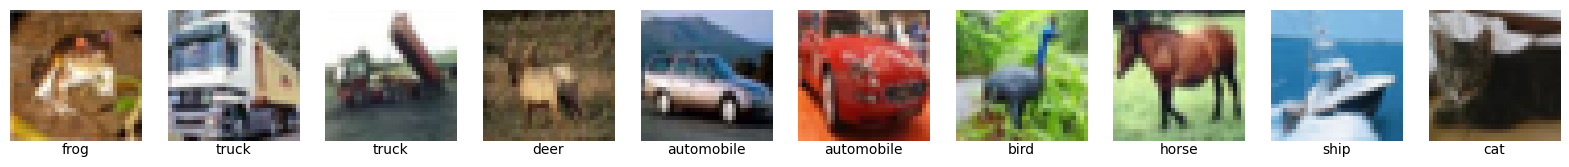

In [27]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()
x_train,x_test=x_train/255.0,x_test/255.0 # 0~1
# 将标签转换为 one-hot 编码
y_train=utils.to_categorical(y_train,NUM_CLASSES)
y_test=utils.to_categorical(y_test,NUM_CLASSES)
labels=CLASSES[np.argmax( y_train[:10],axis=-1)]
display(x_train[:10],labels) 

## build model

In [34]:
input_layer=layers.Input( (32,32,3) )
# each filter has only one bias & make one new channel;  
#each filter has 4 parameters(mean,sigma gamma,beta)
x=layers.Conv2D( filters=32,kernel_size=3,strides=1,padding='same' )(input_layer)
x=layers.BatchNormalization()(x)
x=layers.LeakyReLU()(x)

x=layers.Conv2D(filters=32,kernel_size=3,strides=2,padding='same')(x)
x=layers.BatchNormalization()(x)
x=layers.LeakyReLU()(x)

x=layers.Conv2D(filters=64,kernel_size=3,strides=1,padding='same')(x)
x=layers.BatchNormalization()(x)
x=layers.LeakyReLU()(x)

x=layers.Conv2D(filters=64,kernel_size=3,strides=2,padding='same')(x)

x=layers.BatchNormalization()(x)
x=layers.LeakyReLU(name="last_cnn")(x)


x=layers.Flatten()(x)
x=layers.Dense(128)(x)
x=layers.BatchNormalization()(x)
x=layers.LeakyReLU()(x)
x=layers.Dropout(rate=0.5)(x)  #during predict,no dropout.

x=layers.Dense(NUM_CLASSES)(x)
output_layer=layers.Activation('softmax')(x)

model=models.Model(input_layer,output_layer)
model.summary()
# 640 Non_trainable paras:the mean sigama for each BN

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_12 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 32)        9248      
                                                                 
 batch_normalization_13 (Ba  (None, 16, 16, 32)        128       
 tchNormalization)                                         

# train the models/

In [35]:
#opt=optimizers.Adam(learning_rate=0.0005)
opt=optimizers.legacy.Adam(learning_rate=0.0005)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])


In [36]:
model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=10,
    shuffle=True,
    validation_data=(x_test,y_test)
)

Epoch 1/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.5401 - accuracy: 0.4637 - val_loss: 1.5548 - val_accuracy: 0.4588
Epoch 2/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.1370 - accuracy: 0.5993 - val_loss: 0.9975 - val_accuracy: 0.6455
Epoch 3/10
1563/1563 [==============================] - 32s 21ms/step - loss: 0.9996 - accuracy: 0.6525 - val_loss: 1.0208 - val_accuracy: 0.6415
Epoch 4/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.9203 - accuracy: 0.6811 - val_loss: 0.9913 - val_accuracy: 0.6508
Epoch 5/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.8576 - accuracy: 0.7023 - val_loss: 1.0314 - val_accuracy: 0.6402
Epoch 6/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.7977 - accuracy: 0.7220 - val_loss: 0.9335 - val_accuracy: 0.6793
Epoch 7/10
1563/1563 [==============================] - 35s 23ms/step - loss: 0.7552 - accuracy: 0.7357 - val_loss: 0.8426 -

In [37]:
model.save('zyn_model_cnn')

INFO:tensorflow:Assets written to: zyn_model_cnn/assets


INFO:tensorflow:Assets written to: zyn_model_cnn/assets


In [56]:
new_model=models.load_model('zyn_model_cnn/')

In [59]:
cnn_output=new_model.get_layer('last_cnn').output
cnn_model=models.Model(inputs=new_model.input,outputs=cnn_output)

(0.0, 1.0, 0.0, 1.0)

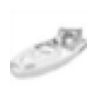

In [84]:
#image_path = 'path_to_your_image.jpg'

# 指定图像的尺寸
width = 1  # 图像宽度（英寸）
height = 1  # 图像高度（英寸）

# 读取图像
#image = plt.imread(image_path)
img=x_test[218]
# 创建图像窗口，并设置固定尺寸
fig, ax = plt.subplots(figsize=(width, height))

# 绘制图像
ax.imshow(img, extent=[0, width, 0, height])

# 隐藏坐标轴
ax.axis('off')

In [85]:
img= np.array(img).reshape((1, img.shape[0], img.shape[1], img.shape[2]))

In [86]:
pred_img=cnn_model.predict(img)

1/1 [==============================] - 0s 10ms/step


In [88]:
pred_img.shape

(1, 8, 8, 64)

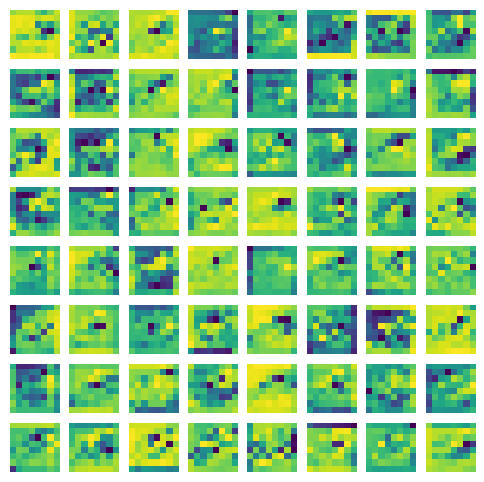

In [89]:
n_filters=pred_img.shape[-1]
n_cols = 8  
n_rows = 8  
fig, axs = plt.subplots(n_rows, n_cols, figsize=(6, 6))  
for i in range(n_rows):  
    for j in range(n_cols):  
        selected_filter = pred_img[0, :, :, i*n_cols+j]  
        axs[i, j].imshow(selected_filter, cmap='viridis_r')  
        axs[i, j].axis('off')  

In [96]:
model.evaluate(x_test,y_test,batch_size=1000)

10/10 [==============================] - 1s 99ms/step - loss: 0.8776 - accuracy: 0.6987


[0.8776372075080872, 0.6987000107765198]

In [109]:
preds=model.predict(x_test)
preds=CLASSES[np.argmax(preds,axis=-1)]
acts=CLASSES[np.argmax(y_test, axis=-1)]

313/313 [==============================] - 2s 5ms/step


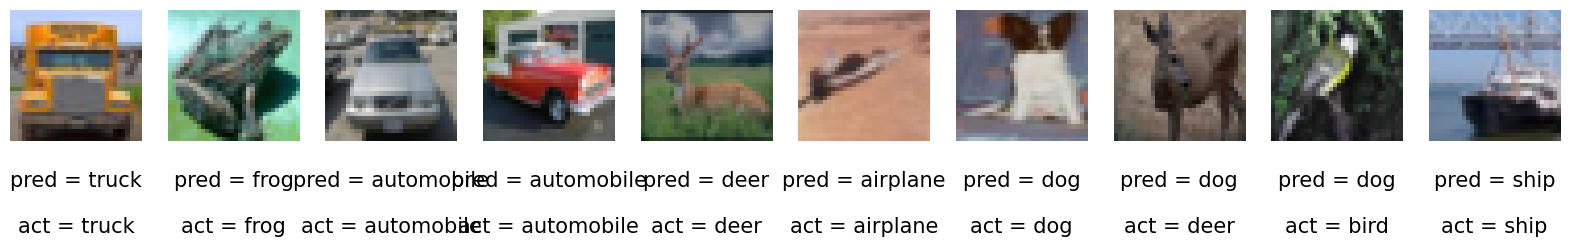

In [133]:
num_to_show=10
indics=np.random.choice(range(len(x_test)),num_to_show)

fig = plt.figure(figsize=(20, 30))
#fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, idx in enumerate(indics):
    img = x_test[idx]
    ax = fig.add_subplot(1, num_to_show, i + 1)
    ax.axis("off")
    ax.imshow(img)
    ax.text(
        0.5,
        -0.35,
        "pred = " + str(preds[idx]),
        fontsize=15,
        ha="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        -0.7,
        "act = " + str(acts[idx]),
        fontsize=15,
        ha="center",
        transform=ax.transAxes,
    )


两种多图绘制法:
一:
    fig=plt.figure() or fig=plt.figure(figsize=(15,3))
    for i in range(n):  
        ax = fig.add_subplot(1, n, i+1)  # add a subplot  
        ax.imshow(img[i])
二:
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(6, 6))
    axs[i,j].imshow(img[k])
        

(-0.5, 31.5, 31.5, -0.5)

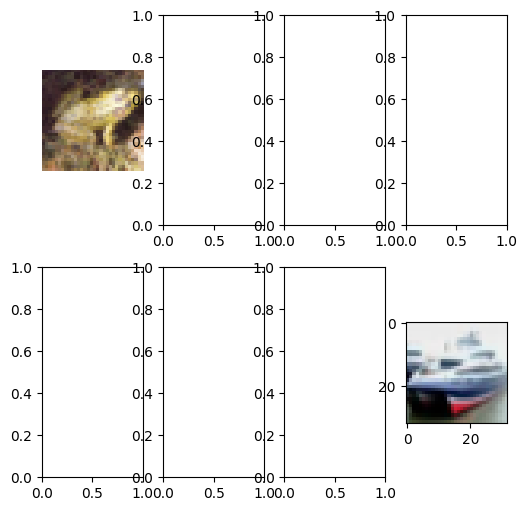

In [139]:
fig, axs = plt.subplots(2, 4, figsize=(6, 6))
axs[1,3].imshow(x_test[1])
axs[0,0].imshow(x_test[19])
axs[0,0].axis('off')